# Loan Prediction Problem
A Finance company wants to automate the loan eligibility process based on the customer details provided while filling application form. These details are Gender,Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# Data loading and cleaning

In [2]:
# Loading dataset
train = pd.read_csv('/kaggle/input/loan-data/train_u6lujuX_CVtuZ9i (2).csv')
predict = pd.read_csv('/kaggle/input/loan-data/test_Y3wMUE5_7gLdaTN (1).csv')

Make copy of the original datasets so we do not hamper the original datasets.

In [3]:
train_original = train.copy()
predict_original = predict.copy()

In [4]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [5]:
predict.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


## Data Cleaning - Checking and working with missing value

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [8]:
train.drop('Loan_ID',axis=1,inplace=True)

In [9]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

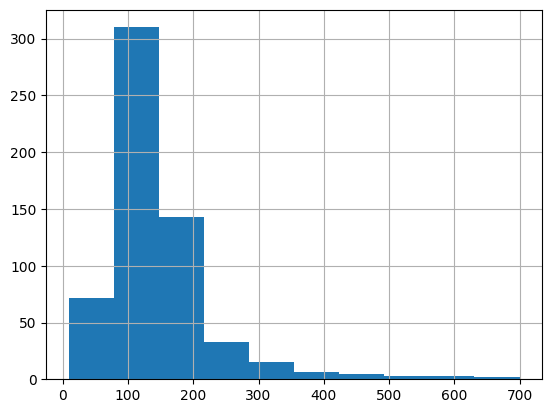

In [10]:
train.LoanAmount.hist()

In [11]:
train=train.replace("",np.nan)
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])
train['Married']=train['Married'].fillna(train['Married'].mode()[0])
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].mode()[0])

**Use KNN to predict missing value for train dataset**

In [12]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5) 
train[['LoanAmount']] = imputer.fit_transform(train[['LoanAmount']])

In [13]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
predict.drop('Loan_ID',axis=1,inplace=True)

In [15]:
predict.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<Axes: >

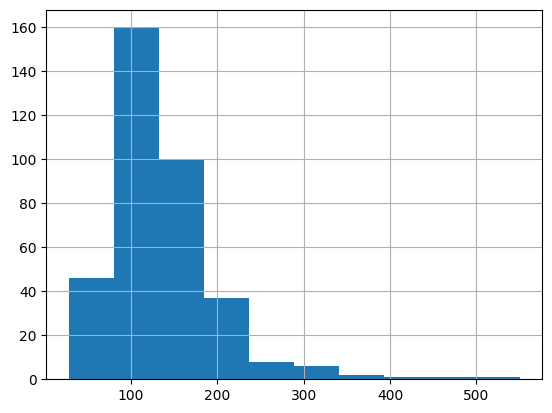

In [16]:
predict.LoanAmount.hist()

In [17]:
predict=predict.replace("",np.nan)
predict['Gender']=predict['Gender'].fillna(predict['Gender'].mode()[0])
predict['Dependents']=predict['Dependents'].fillna(predict['Dependents'].mode()[0])
predict['Self_Employed']=predict['Self_Employed'].fillna(predict['Self_Employed'].mode()[0])
predict['Loan_Amount_Term']=predict['Loan_Amount_Term'].fillna(predict['Loan_Amount_Term'].mode()[0])
predict['Credit_History']=predict['Credit_History'].fillna(predict['Credit_History'].mode()[0])

**Use linear Regression to predict missing value for predict dataset**

In [18]:
from sklearn.linear_model import LinearRegression

# 1. get_dummies to process categorical column
predict_encoded = pd.get_dummies(predict)

# 2. seperate null and nonull into two column
predict_with_loan = predict_encoded[predict_encoded['LoanAmount'].notnull()]
predict_without_loan = predict_encoded[predict_encoded['LoanAmount'].isnull()]

# 3. define predictor column ( no loanamount)
predictor_columns = predict_encoded.columns.drop('LoanAmount')

# 4. train model
X_train = predict_with_loan[predictor_columns]
y_train = predict_with_loan['LoanAmount']
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 5. predict missing value
X_missing = predict_without_loan[predictor_columns]
loan_predicted = regressor.predict(X_missing)

# 6. fill value
predict.loc[predict['LoanAmount'].isnull(), 'LoanAmount'] = loan_predicted

print(predict['LoanAmount'])

0      110.0
1      126.0
2      208.0
3      100.0
4       78.0
       ...  
362    113.0
363    115.0
364    126.0
365    158.0
366     98.0
Name: LoanAmount, Length: 367, dtype: float64


In [19]:
predict.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [20]:
predict.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Exploratory Data Analysis

**Categorical**

In [21]:
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

<Axes: title={'center': 'Loan Status'}, xlabel='Loan_Status'>

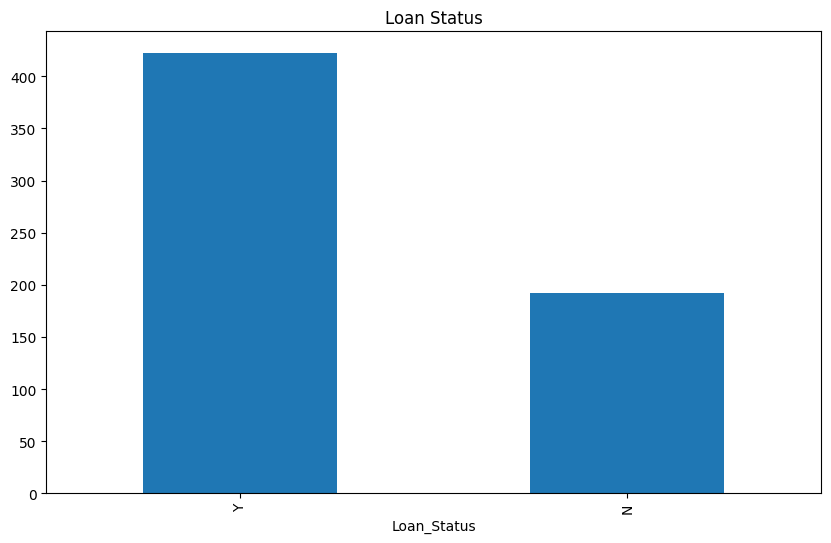

In [22]:
train['Loan_Status'].value_counts().plot.bar(figsize=(10,6), title='Loan Status')

**The loan of 422(around 69%) people out of 614 was approved.**

<Axes: title={'center': 'Credit_History'}, xlabel='Credit_History'>

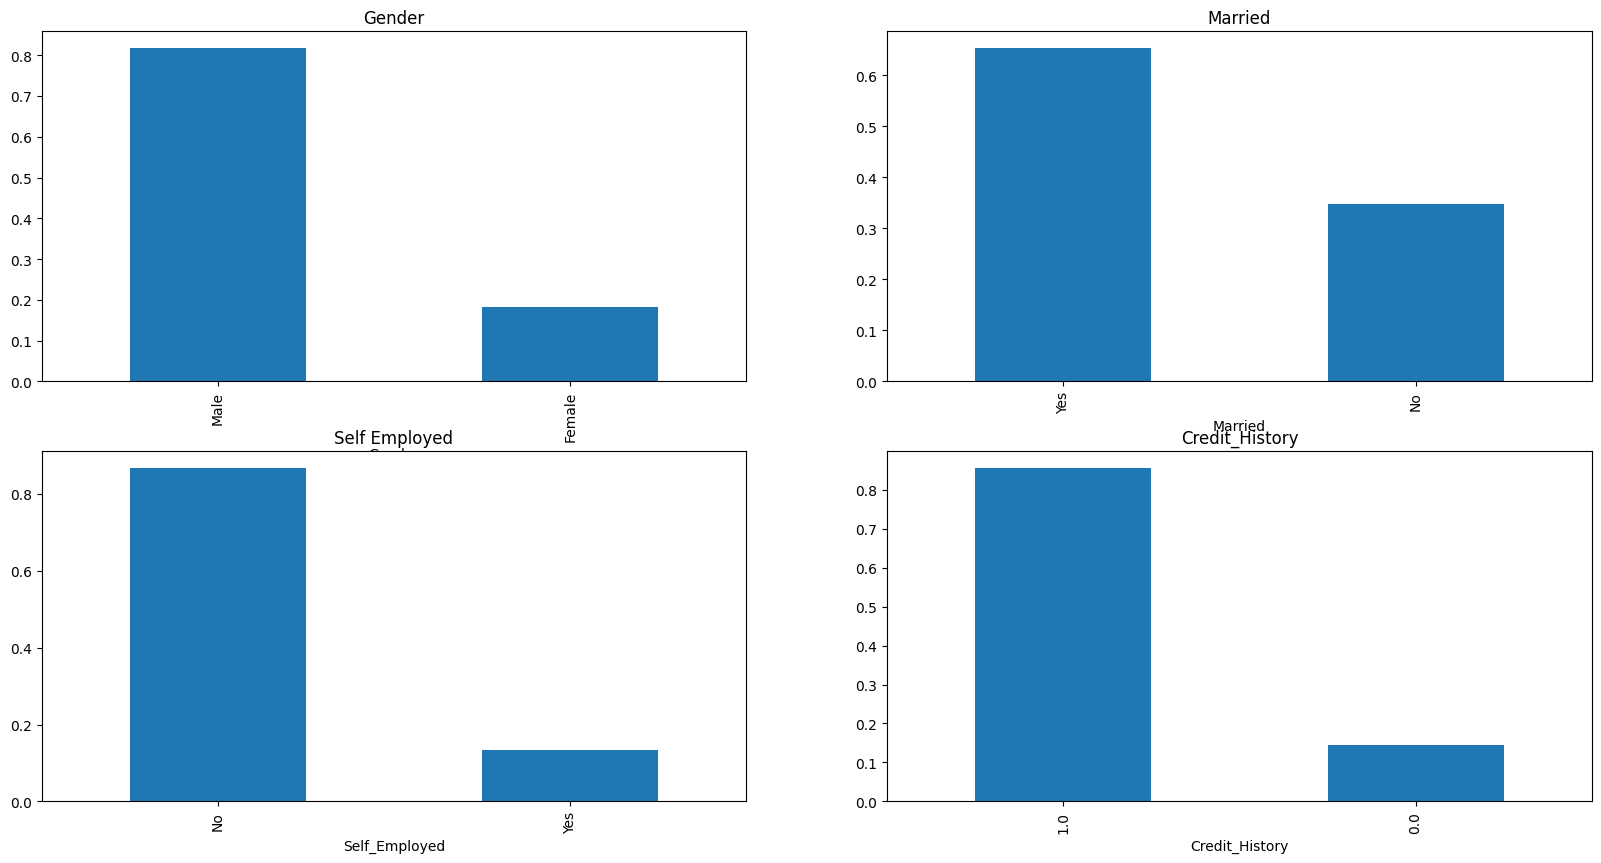

In [23]:
plt.figure(figsize=(10,8))
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

- 80% applicants in the dataset are male.
- Around 65% people are married.
- Around 15% applicants in the dataset are self employed.
- Around 85% applicants have repaid their debts.

<Axes: title={'center': 'Property Area'}, xlabel='Property_Area'>

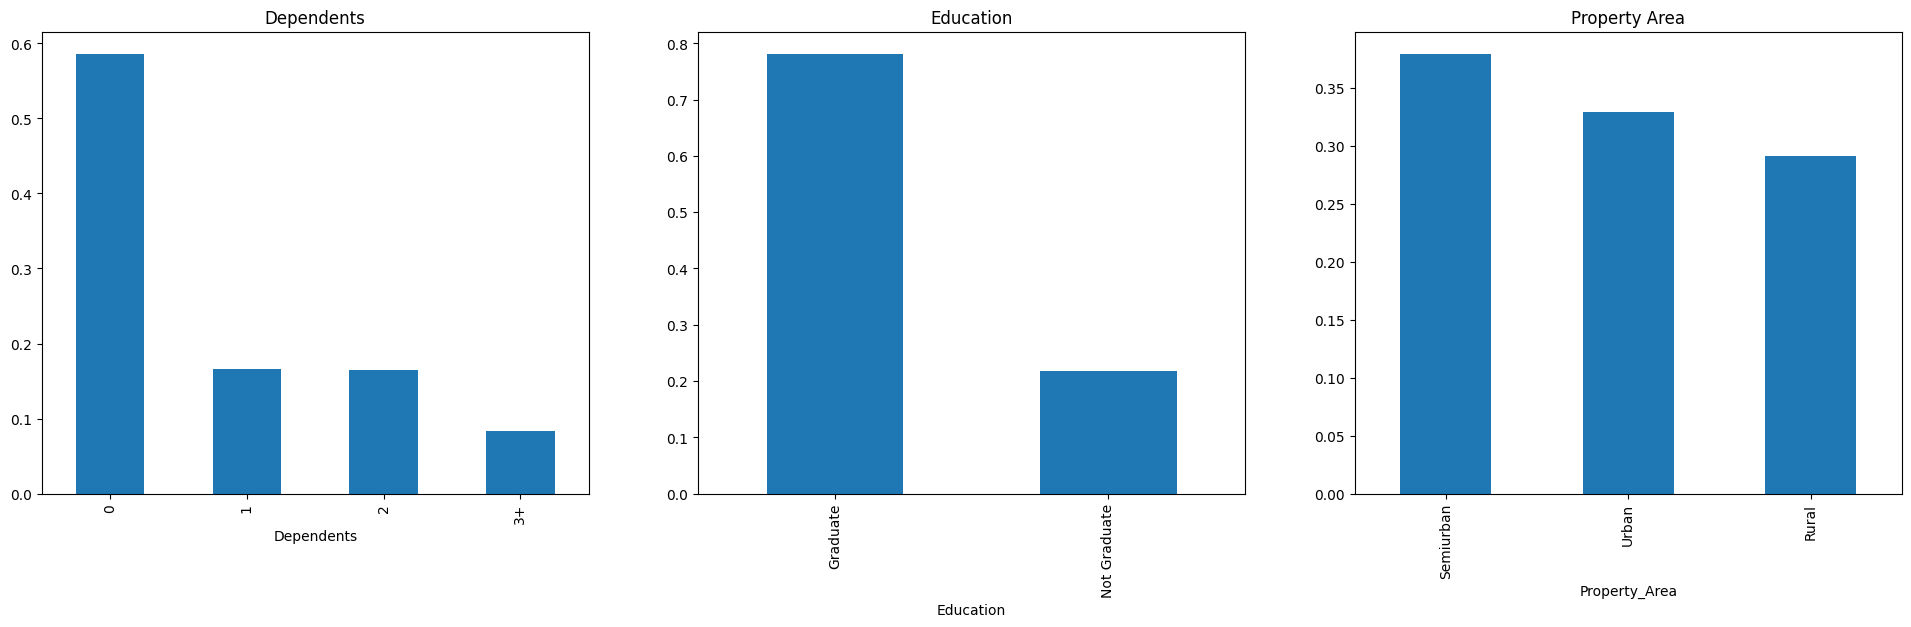

In [24]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')

- Most of the applicants don't have dependents.
- Around 80% of the applicants are graduate.
- Most of the applicants are from Semiurban area.

**Numerical**

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

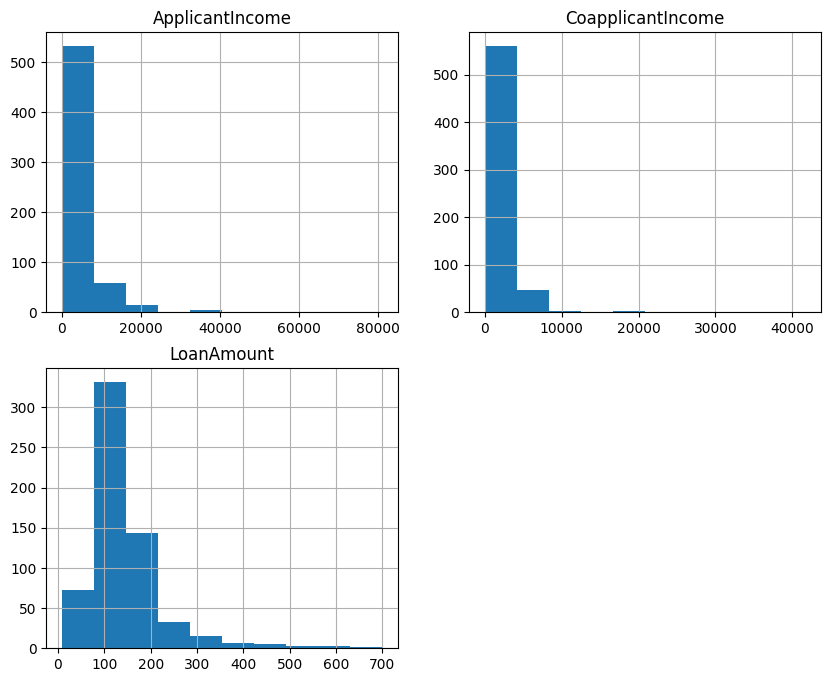

In [25]:
plt.figure(figsize=(10, 8))
plt.subplot(221)
train['ApplicantIncome'].hist()
plt.title('ApplicantIncome')
plt.subplot(222)
train['CoapplicantIncome'].hist()
plt.title('CoapplicantIncome')
plt.subplot(223)
train['LoanAmount'].hist()
plt.title('LoanAmount')
plt.tight_layout

<Axes: >

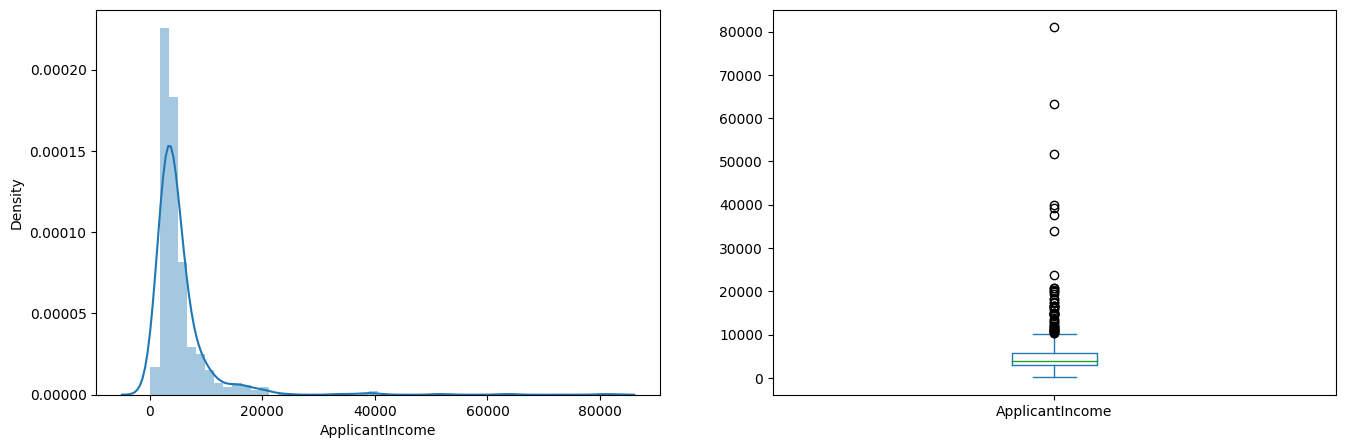

In [26]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

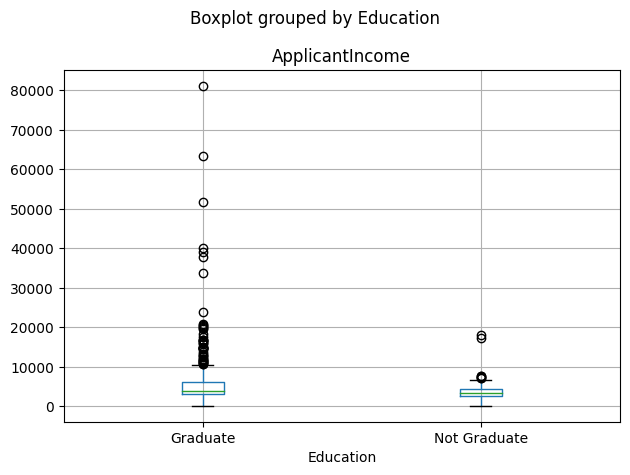

In [27]:
train.boxplot(column= 'ApplicantIncome', by='Education')
plt.tight_layout()

**There are higher number of graduates with very high incomes which are appearing to be outliers.**

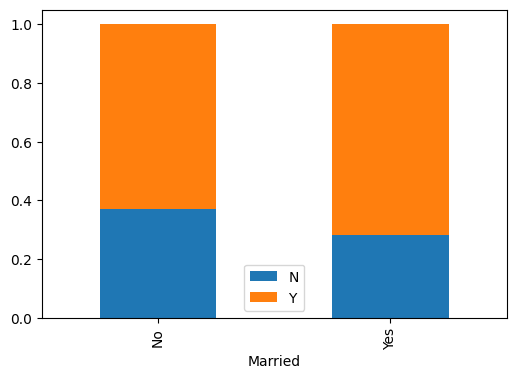

In [28]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

**The approval rate for married applicants is 10% higher than for non-married applicants.**

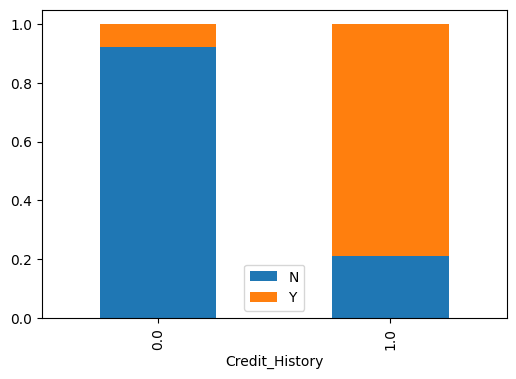

In [29]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(loc = 'best')

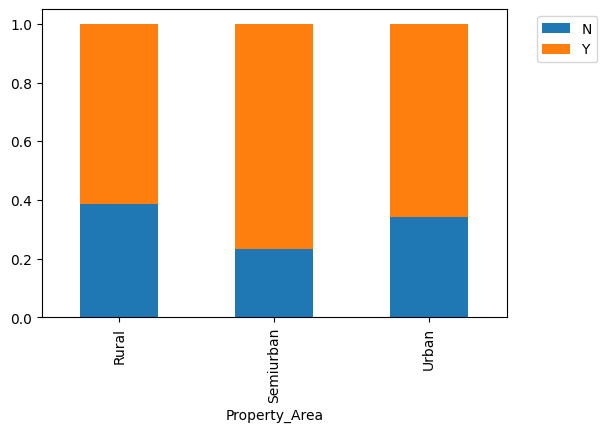

In [30]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(6,4))
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

- Proportion of married applicants is higher for the approved loans.
- People with credit history as 1 are more likely to get their loan approved.
- Proportion of loans getting approved in semiurban area is higher compared to rural or urban area.

**Customer Segmentation**

In [31]:
# Create new dataset while add more column 
train_seg=train.copy()

In [32]:
train_seg['Total_Income'] = train_seg['ApplicantIncome'] + train_seg['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group= ['Low', 'Average', 'High', 'Very High']
train_seg['Total_Income_bin'] = pd.cut(train_seg['Total_Income'], bins, labels=group)
train_seg

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,Very High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,High
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0,Average
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0,High
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0,Very High
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0,Very High


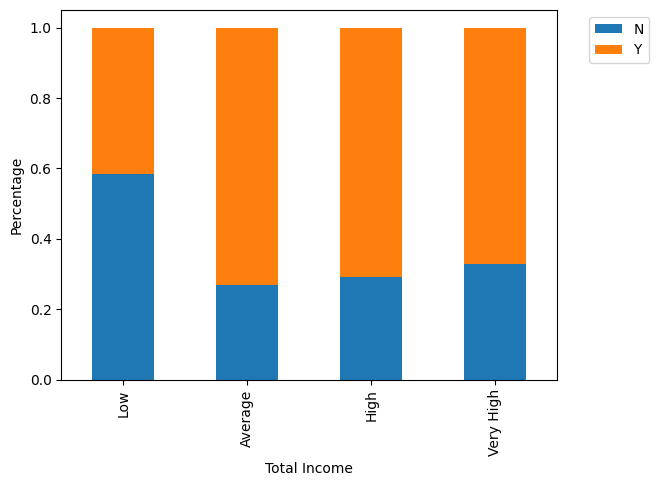

In [33]:
Total_Income_bin = pd.crosstab(train_seg['Total_Income_bin'], train_seg['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05,1.0),loc='best')

**Proportions of loan getting approvals for applicants having low Total_Income is very less compared to that of applicants with Average, High and Very High income.**

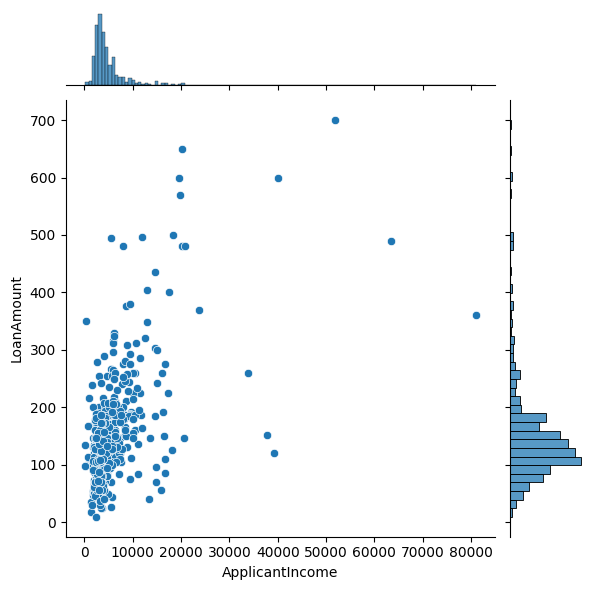

In [34]:
sns.jointplot(x=train['ApplicantIncome'],y=train['LoanAmount'])

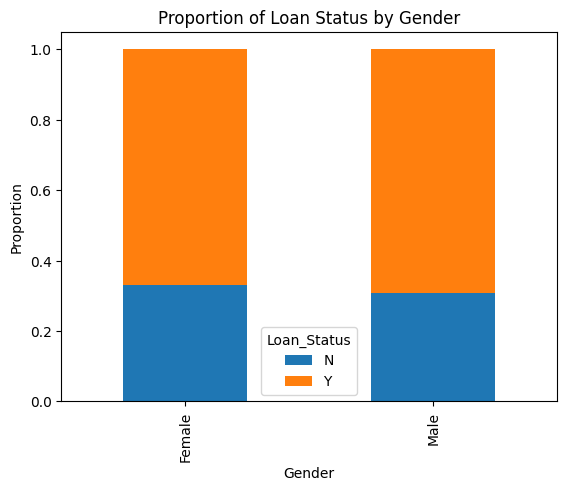

In [35]:
gender_loan_status = pd.crosstab(train['Gender'], train['Loan_Status'])
gender_loan_status.div(gender_loan_status.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Proportion of Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()

In [36]:
#Create copy dataset while process data into numberical
train_heatmap=train.copy()
predict_heatmap=predict.copy()

In [37]:
train_heatmap['Dependents'].replace('3+', 3, inplace=True)
predict_heatmap['Dependents'].replace('3+', 3, inplace=True)
train_heatmap['Loan_Status'].replace('N', 0, inplace=True)
train_heatmap['Loan_Status'].replace('Y', 1, inplace=True)

In [38]:
train_heatmap.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [39]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoder = LabelEncoder()
train_heatmap['Gender'] = label_encoder.fit_transform(train_heatmap['Gender'])
train_heatmap['Married'] = label_encoder.fit_transform(train_heatmap['Married'])
train_heatmap['Education'] = label_encoder.fit_transform(train_heatmap['Education'])
train_heatmap['Self_Employed'] = label_encoder.fit_transform(train_heatmap['Self_Employed'])
train_heatmap['Property_Area'] = label_encoder.fit_transform(train_heatmap['Gender'])

<Axes: >

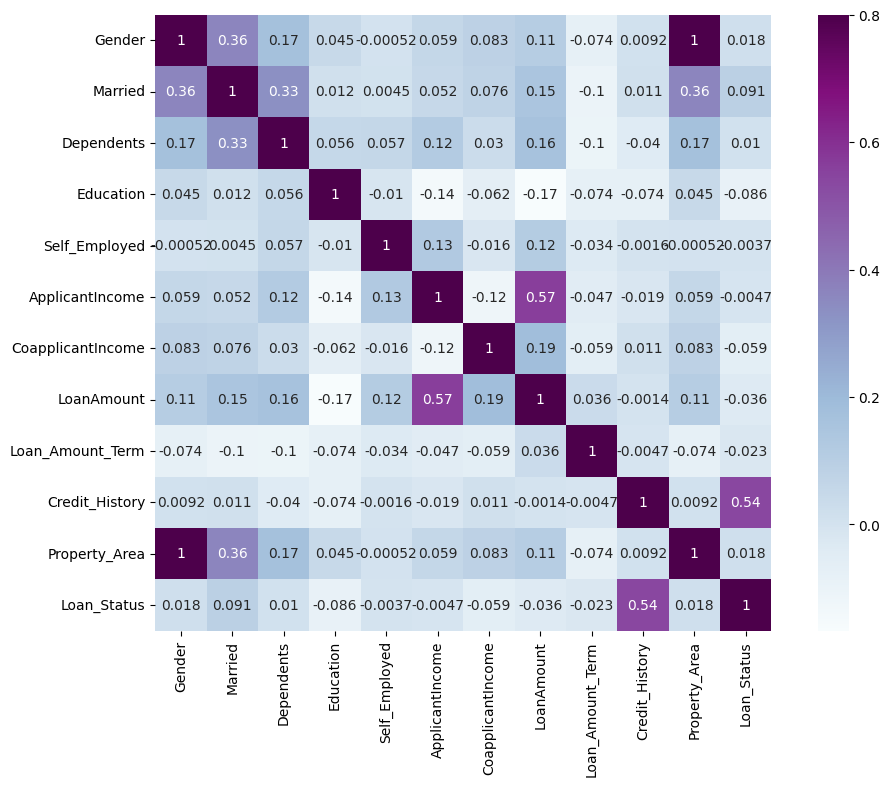

In [40]:
correlation_matrix = train_heatmap.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', vmax=0.8, square=True)

**We can see that most correlated variables are (ApplicantIncome-LoanAmount) and (Credit_History-Loan_Status). LoanAmount is also correlated with CoapplicantIncome.**

# Model Building

In [41]:
# Create copy for ml model to save the dataset after missing value haddling
train_ml=train.copy()
predict_ml=predict.copy()

In [42]:
predict_ml.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [43]:
train_ml['Dependents'].replace('3+', 3, inplace=True)
predict_ml['Dependents'].replace('3+', 3, inplace=True)
train_ml['Loan_Status'].replace('N', 0, inplace=True)
train_ml['Loan_Status'].replace('Y', 1, inplace=True)

In [44]:
X = train_ml.drop('Loan_Status', axis = 1)
y = train_ml['Loan_Status']

In [45]:
X = pd.get_dummies(X)
train_ml = pd.get_dummies(train_ml)
predict_ml = pd.get_dummies(predict_ml)

In [46]:
train_ml.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,False,True,True,False,...,True,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.000000,360.0,1.0,0,False,True,False,True,...,False,True,False,True,False,True,False,True,False,False
2,3000,0.0,66.000000,360.0,1.0,1,False,True,False,True,...,True,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.000000,360.0,1.0,1,False,True,False,True,...,True,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.000000,360.0,1.0,1,False,True,True,False,...,True,False,False,True,False,True,False,False,False,True


**Training a Decision Tree Classifier**

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
#X contains the features, and y is the target variable (or label)
#30% of the data will be used for testing, and 70% for training.
#This split helps evaluate model performance on unseen data (X_test and y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)
#Train model in known data
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [50]:
# Predict labels for X_test
predictions = model.predict(X_test)

**Evaluating the Decision Tree Classifier**

In [51]:
from sklearn.metrics import accuracy_score, classification_report

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.54      0.55      0.54        64
           1       0.76      0.75      0.76       121

    accuracy                           0.68       185
   macro avg       0.65      0.65      0.65       185
weighted avg       0.68      0.68      0.68       185



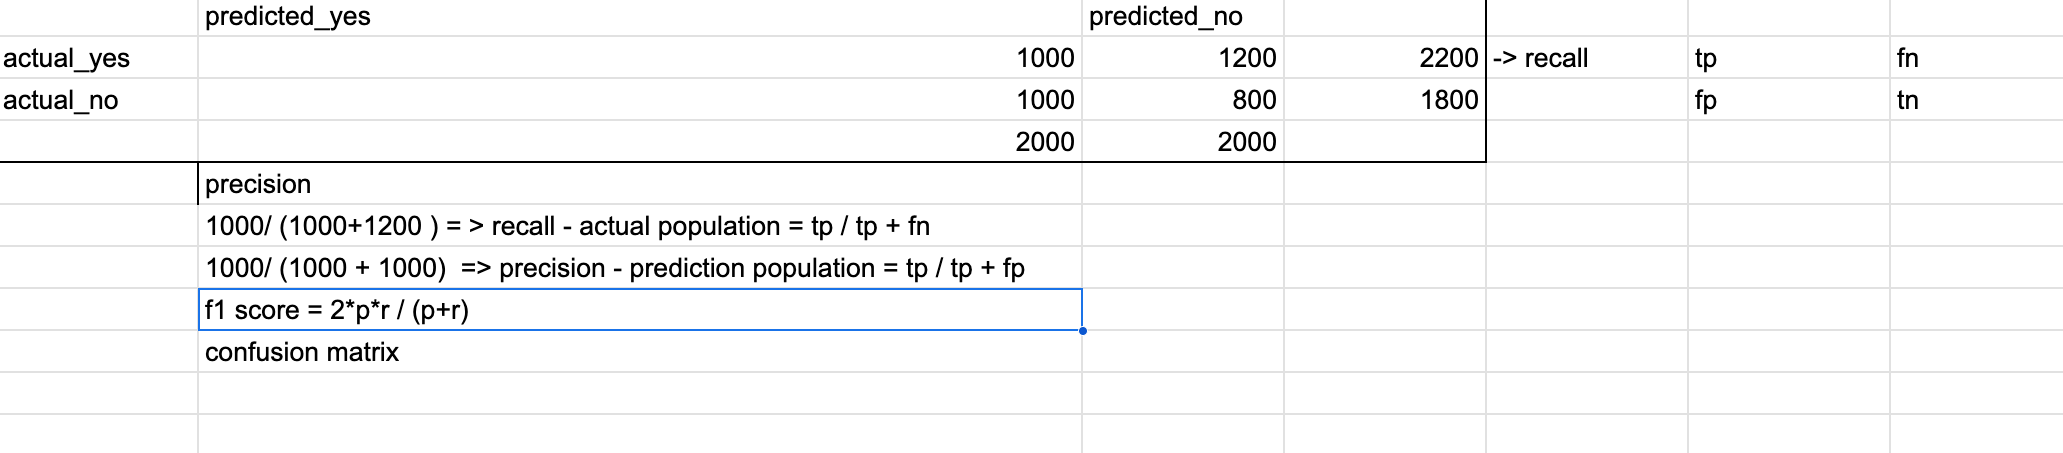

In [53]:
#Comparing them with the true labels in y_test.
print(accuracy_score(y_test, predictions))

0.6810810810810811


**RandomForest**

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfmodel = RandomForestClassifier(n_estimators=500)

In [56]:
rfmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [57]:
rfpredictions = rfmodel.predict(X_test)

In [58]:
print(accuracy_score(y_test, rfpredictions))

0.7567567567567568


In [59]:
print(classification_report(y_test, rfpredictions))

              precision    recall  f1-score   support

           0       0.74      0.45      0.56        64
           1       0.76      0.92      0.83       121

    accuracy                           0.76       185
   macro avg       0.75      0.69      0.70       185
weighted avg       0.75      0.76      0.74       185



# Compare with Other Models: logistic/knn/xgboost/nn/gbm/svm

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define the models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Neural Network": MLPClassifier(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC()
}

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Precision (Class 0)', 'Recall (Class 0)', 'F1-Score (Class 0)',
                                'Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 'Accuracy'])
results_list=[]
# Loop through each model, train, and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    predictions = model.predict(X_test)
    # Compute accuracy, precision, recall, and F1-score for both classes
    accuracy = accuracy_score(y_test, predictions)
    precision_class_0 = precision_score(y_test, predictions, pos_label=0)
    recall_class_0 = recall_score(y_test, predictions, pos_label=0)
    f1_class_0 = f1_score(y_test, predictions, pos_label=0)
    precision_class_1 = precision_score(y_test, predictions, pos_label=1)
    recall_class_1 = recall_score(y_test, predictions, pos_label=1)
    f1_class_1 = f1_score(y_test, predictions, pos_label=1)
    
    results_list.append({
        'Model': model_name,
        'Precision (Denied)': precision_class_0,
        'Recall (Denied)': recall_class_0,
        'F1-Score (Denied)': f1_class_0,
        'Precision (Approved)': precision_class_1,
        'Recall (Approved)': recall_class_1,
        'F1-Score (Approved)': f1_class_1,
        'Accuracy': accuracy
    })

# Convert the results list to a DataFrame
results = pd.DataFrame(results_list)


results

,Model,Precision (Denied),Recall (Denied),F1-Score (Denied),Precision (Approved),Recall (Approved),F1-Score (Approved),Accuracy
0,Logistic Regression,0.810811,0.468750,0.594059,0.770270,0.942149,0.847584,0.778378
1,K-Nearest Neighbors,0.407407,0.171875,0.241758,0.664557,0.867769,0.752688,0.627027
2,Random Forest,0.789474,0.468750,0.588235,0.768707,0.933884,0.843284,0.772973
3,Decision Tree,0.567164,0.593750,0.580153,0.779661,0.760331,0.769874,0.702703
4,XGBoost,0.744681,0.546875,0.630631,0.789855,0.900826,0.841699,0.778378
5,Neural Network,0.302083,0.453125,0.362500,0.606742,0.446281,0.514286,0.448649
6,Gradient Boosting,0.805556,0.453125,0.580000,0.765101,0.942149,0.844444,0.772973
7,Support Vector Machine,0.000000,0.000000,0.000000,0.654054,1.000000,0.790850,0.654054


# Hyparameter tuning on RandomForest

In [61]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42,n_jobs=-1)

# Set up the parameter grid for Grid Search
param_grid = {
    'n_estimators': [10,25,30,50, 100, 200],    # Number of trees
    'max_depth': [2,3,5,10,20], # Maximum depth of each tree
    'min_samples_split': [5, 10,20,50,100,200] # Minimum samples required to split a node

}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=4, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
grid_search.best_params_
best_rf_model = grid_search.best_estimator_
best_rf_model


Fitting 4 folds for each of 180 candidates, totalling 720 fits


RandomForestClassifier(max_depth=3, min_samples_split=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [62]:
predictions = best_rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.7891891891891892
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        64
           1       0.77      0.98      0.86       121

    accuracy                           0.79       185
   macro avg       0.83      0.71      0.72       185
weighted avg       0.81      0.79      0.77       185



# Feature Importance for Random Forest

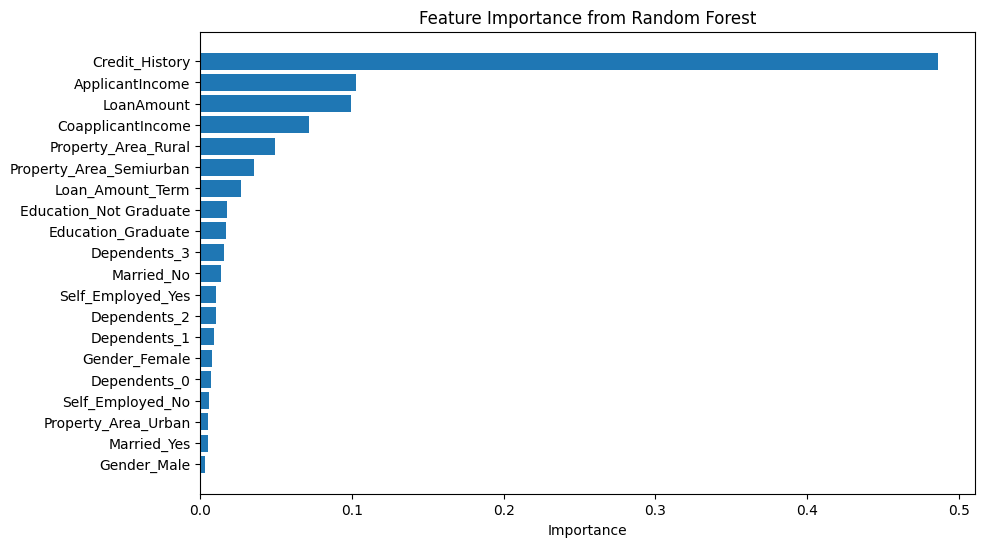

In [63]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [64]:
# Use the trained model to predict on the 'predict' dataset
predictions =  best_rf_model.predict(predict_ml)
predict_ml['Loan_Status'] = predictions
predict_ml

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,...,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5720,0,110.0,360.0,1.0,False,True,False,True,False,...,False,False,True,False,True,False,False,False,True,1
1,3076,1500,126.0,360.0,1.0,False,True,False,True,False,...,True,False,True,False,True,False,False,False,True,1
2,5000,1800,208.0,360.0,1.0,False,True,False,True,False,...,False,True,True,False,True,False,False,False,True,1
3,2340,2546,100.0,360.0,1.0,False,True,False,True,False,...,False,True,True,False,True,False,False,False,True,1
4,3276,0,78.0,360.0,1.0,False,True,True,False,False,...,False,False,False,True,True,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.0,False,True,False,True,True,...,False,False,False,True,False,True,False,False,True,1
363,4158,709,115.0,360.0,1.0,False,True,False,True,False,...,False,False,True,False,True,False,False,False,True,1
364,3250,1993,126.0,360.0,1.0,False,True,True,False,False,...,False,False,True,False,True,False,False,True,False,1
365,5000,2393,158.0,360.0,1.0,False,True,False,True,False,...,False,False,True,False,True,False,True,False,False,1
